In [94]:
import pandas as pd
import numpy as np
crypto = pd.read_csv('Coins.csv', sep = '\t', header = None, names = ['Name', 'Symbol', 'MCap', 'Price', 'Vol', 'CSupply', 'DayChg'])

In [44]:
crypto.shape

(1334, 7)

In [45]:
#turn ?'s into NA's
crypto2 = crypto.replace(to_replace= '?',value=np.nan)

In [46]:
np.sum(crypto2.isnull())
mask = crypto2.isnull().any(axis=1)
crypto2.loc[mask,:].shape  #Find coins without data

(230, 7)

In [47]:
crypto2 = crypto2.dropna() #Remove crypto without information

In [48]:
crypto2['MCap'] = crypto2['MCap'].astype(float) #change type to float

In [49]:
crypto_sorted = crypto2.sort_values(['MCap'], ascending = False)

In [50]:
crypto_sorted = crypto_sorted.reset_index()
type(crypto_sorted)

pandas.core.frame.DataFrame

In [51]:
crypto = crypto_sorted.iloc[:,1:8]

In [52]:
crypto['Price'] = crypto['Price'].astype(float)

In [53]:
crypto['CSupply'] = crypto['CSupply'].astype(float)

In [54]:
crypto['DayChg'] = crypto['DayChg'].astype(float)

In [55]:
crypto = crypto[crypto.astype(str).ne('None').all(1)] #remove observations of none

In [56]:
crypto['Vol'] = crypto['Vol'].astype(float)

In [57]:
crypto.shape

(1103, 7)

In [58]:
crypto['Vol'].describe() #problem in volume, some are not trading

count    1.103000e+03
mean     2.051018e+07
std      2.729665e+08
min      0.000000e+00
25%      1.432010e+03
50%      2.140220e+04
75%      3.633690e+05
max      7.594760e+09
Name: Vol, dtype: float64

In [59]:
crypto['NoVol'] = crypto['Vol'] == 0 #Remove columns with volume is 0

In [60]:
crypto = crypto[crypto['NoVol'] == False] 

In [61]:
crypto = crypto.iloc[:,:7] #remove boolean test on volume

In [62]:
crypto.describe() #check for empty volumes

,MCap,Price,Vol,CSupply,DayChg
count,1.091000e+03,1091.000000,1.091000e+03,1.091000e+03,1091.000000
mean,4.158370e+08,1223.599651,2.073578e+07,8.909247e+09,8.916164
std,5.713810e+09,29274.890260,2.744565e+08,1.215642e+11,18.547606
min,1.148453e+01,0.000003,2.467610e-03,7.826400e-02,-77.222700
25%,6.303580e+05,0.023842,1.553385e+03,6.609237e+06,2.415770
50%,5.878902e+06,0.157286,2.319450e+04,3.017886e+07,7.001020
75%,3.286308e+07,0.882682,3.756745e+05,1.589307e+08,11.768900
max,1.573660e+11,917738.000000,7.594760e+09,2.863993e+12,215.176000


In [63]:
crypto = crypto.sort_values(['Price'], ascending = False)
crypto = crypto[3:] #Very large outliers

In [64]:
crypto = crypto.sort_values(['MCap'], ascending = False)

In [65]:
crypto = crypto.reset_index()

In [66]:
crypto = crypto.iloc[:,1:8] #Remove Index again

In [67]:
crypto['MCap'] = crypto['MCap']/1000000000

In [68]:
%matplotlib inline 
from matplotlib import pyplot as plt
import numpy.matlib
import seaborn as sns
plt.style.use('ggplot') #plot

In [69]:
P = crypto['Price']
M = crypto['MCap']
V = crypto['Vol']
C = crypto['CSupply']

First = crypto['MCap'].max()
First_name = crypto.loc[crypto.MCap == First, 'Name'].tolist()[0]
First_price = crypto.loc[crypto.MCap == First, 'Price']

Second = crypto['MCap'][1] #second largest MCap
Second_name = crypto.loc[crypto.MCap == Second, 'Name'].tolist()[0]
Second_price = crypto.loc[crypto.MCap == Second, 'Price']

Third = crypto['MCap'][2] #third largest MCap
Third_name = crypto.loc[crypto.MCap == Third, 'Name'].tolist()[0]
Third_price = crypto.loc[crypto.MCap == Third, 'Price']

Fourth = crypto['MCap'][3] #fourth largest MCap
Fourth_name = crypto.loc[crypto.MCap == Fourth, 'Name'].tolist()[0]
Fourth_price = crypto.loc[crypto.MCap == Fourth, 'Price']

Fifth = crypto['MCap'][4] #Fifth largest MCap
Fifth_name = crypto.loc[crypto.MCap == Fifth, 'Name'].tolist()[0]
Fifth_price = crypto.loc[crypto.MCap == Fifth, 'Price']

Text(0.385368,9.99146,'   Cardano  ')

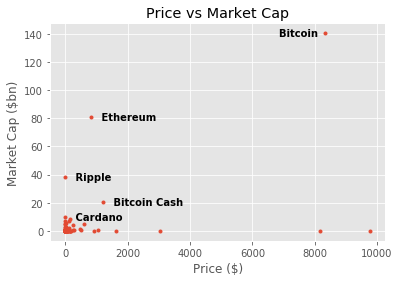

In [258]:
plt.plot(P, M, '.')
plt.xlabel('Price ($)')
plt.ylabel('Market Cap ($bn)')
plt.title('Price vs Market Cap')
plt.text(First_price, First, '%s  ' %(First_name),
         color = 'black', size = 10, fontweight = 'bold', 
         verticalalignment = 'center', horizontalalignment = 'right')
plt.text(Second_price, Second, '   %s  ' %(Second_name),
         color = 'black', size = 10, fontweight = 'bold', 
         verticalalignment = 'center', horizontalalignment = 'left')
plt.text(Third_price, Third, '   %s  ' %(Third_name),
         color = 'black', size = 10, fontweight = 'bold', 
         verticalalignment = 'center', horizontalalignment = 'left')
plt.text(Fourth_price, Fourth, '   %s  ' %(Fourth_name),
         color = 'black', size = 10, fontweight = 'bold', 
         verticalalignment = 'center', horizontalalignment = 'left')
plt.text(Fifth_price, Fifth, '   %s  ' %(Fifth_name),
         color = 'black', size = 10, fontweight = 'bold', 
         verticalalignment = 'center', horizontalalignment = 'left')

In [70]:
#Not all the coins have massive market caps
#Of the 1,078 coins, the vast majority are below $10mn
crypto.shape

(1088, 7)

Text(0.5,1,'Histogram of Coins with Market Cap Below $10mn')

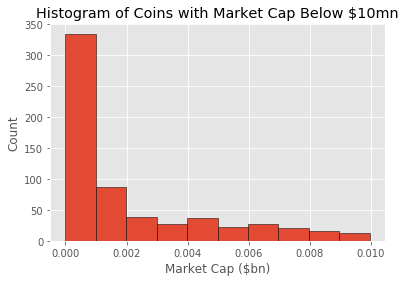

In [71]:
plt.hist(crypto['MCap'][crypto.MCap <= 0.01], bins= 10, edgecolor = 'k')
plt.xlabel('Market Cap ($bn)')
plt.ylabel('Count')
plt.title('Histogram of Coins with Market Cap Below $10mn')

In [72]:
#Let's look at only the largest coins outstanding
Top = crypto[crypto['MCap'] > 1] #W/ market caps above $1bn
Top.index = Top['Name']
Top = Top.iloc[:,1:7]

Text(0.5,1,'Top 10 Crypto Currencies')

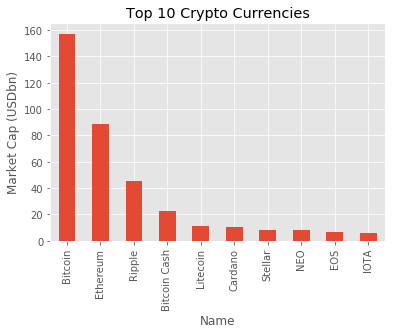

In [73]:
Top['MCap'].sort_values(ascending = False).head(10).plot.bar()
plt.ylabel('Market Cap (USDbn)')
plt.title('Top 10 Crypto Currencies')

In [74]:
ZTop = np.zeros(Top.shape[0])
ZTop[0] = 0.2
ZTop
my_list=['']*len(Top.Symbol[5:])
my_list
SymbPie = np.concatenate((Top.index[0:5],my_list),axis = 0)


In [75]:
def my_autopct(pct):
    return ('%1.1f%%' % pct) if pct > 2.5 else ''

Text(0.5,1,'Market Cap Weights of Largest Coins')

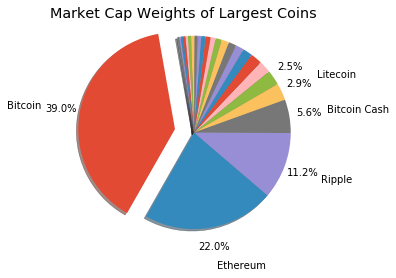

In [76]:
plt.pie(Top['MCap'],explode = ZTop, labels = SymbPie, autopct = my_autopct, pctdistance = 1.2, labeldistance = 1.4, shadow = True, startangle = 100)
plt.axis('equal')
plt.title('Market Cap Weights of Largest Coins')

In [77]:
Top['positive'] = Top['DayChg'] > 0
Top.head()

,Symbol,MCap,Price,Vol,CSupply,DayChg,positive
Name,,,,,,,
Bitcoin,BTC,157.365985,9330.79000,7.594760e+09,1.686524e+07,7.56059,True
Ethereum,ETH,88.749809,909.16400,2.712640e+09,9.761694e+07,7.23674,True
Ripple,XRP,45.093093,1.15596,1.279590e+09,3.900922e+10,12.17690,True
Bitcoin Cash,BCH,22.672650,1336.23000,6.079260e+08,1.696762e+07,7.75265,True
Litecoin,LTC,11.512996,208.50000,2.250840e+09,5.521821e+07,30.81200,True


In [41]:
Top['color'] = Top.DayChg.apply(lambda x: 'green' if x > 0 else 'red')
Top

,Symbol,MCap,Price,Vol,CSupply,DayChg,positive,color
Name,,,,,,,,
Bitcoin,BTC,157.365985,9330.790000,7.594760e+09,1.686524e+07,7.560590,True,green
Ethereum,ETH,88.749809,909.164000,2.712640e+09,9.761694e+07,7.236740,True,green
Ripple,XRP,45.093093,1.155960,1.279590e+09,3.900922e+10,12.176900,True,green
Bitcoin Cash,BCH,22.672650,1336.230000,6.079260e+08,1.696762e+07,7.752650,True,green
Litecoin,LTC,11.512996,208.500000,2.250840e+09,5.521821e+07,30.812000,True,green
Cardano,ADA,10.103079,0.389673,2.777030e+08,2.592707e+10,3.823370,True,green
Stellar,XLM,8.238710,0.446844,1.994920e+08,1.843755e+10,6.827650,True,green
NEO,NEO,7.734090,118.986000,2.171160e+08,6.500000e+07,6.592510,True,green
EOS,EOS,6.577018,9.825580,4.924400e+08,6.693771e+08,7.805980,True,green


Text(0.5,1,"Largest Crypto Currencies' performance")

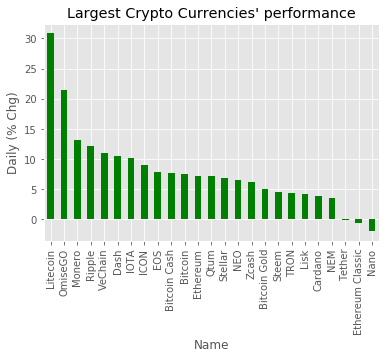

In [78]:
Top['DayChg'].sort_values(ascending = False).plot.bar(color=Top['positive'].map({True: 'green', False: 'red'}))
plt.ylabel('Daily (% Chg)')
plt.title('Largest Crypto Currencies\' performance')

Text(0.5,1,"Largest Crypto Currencies' performance")

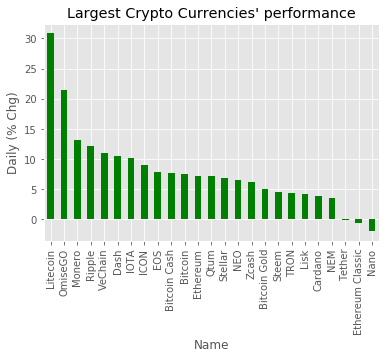

In [104]:
Top['DayChg'].sort_values(ascending = False).plot.bar(color = AaronColor)
plt.ylabel('Daily (% Chg)')
plt.title('Largest Crypto Currencies\' performance')

In [97]:
AaronColor = ['red' if c < 0 else 'green' for c in AaronTop]

In [258]:
Top.color

Name
Bitcoin               red
Ethereum              red
Ripple                red
Bitcoin Cash          red
Cardano               red
Litecoin              red
Stellar             green
NEO                   red
EOS                 green
IOTA                  red
NEM                   red
Dash                  red
Monero                red
Ethereum Classic    green
Lisk                  red
TRON                  red
Qtum                green
Tether                red
Bitcoin Gold        green
VeChain               red
ICON                  red
Zcash                 red
OmiseGO             green
Nano                  red
Steem                 red
Name: color, dtype: object

Text(0.5,1,"Largest Crypto Currencies' performance")

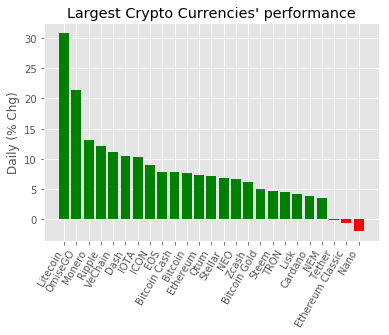

In [105]:
AaronTop = Top['DayChg'].sort_values(ascending = False)
plt.bar(np.arange(AaronTop.shape[0]),AaronTop,color = AaronColor)
plt.xticks(np.arange(AaronTop.shape[0]),AaronTop.index, rotation = 60, ha = 'right')
plt.ylabel('Daily (% Chg)')
plt.title('Largest Crypto Currencies\' performance')

In [93]:
dim(AAronTop)

NameError: name 'dim' is not defined